In [726]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
TRANS_DATA = 'Transactional Data'
REF_DATA = 'Reference Data'

# Question 1

## PRIMARY DIAGNOSIS

In [611]:
accounts = pd.read_csv(TRANS_DATA+'/accounts.csv')
acc=pd.read_csv(TRANS_DATA+'/accounts.csv')
charges = pd.read_csv(TRANS_DATA+'/charges.csv')
diag = pd.read_csv(TRANS_DATA+'/diagnosis.csv')

In [612]:
accounts.head()

,Account ID,Admit Date,Attending Provider ID,Discharge Date,Discharge Year,Facility Code,LOS,MS DRG Code,Patient ZipCode
0,A_0002545965,2018-03-12,PHY_026231,2018-03-14,2018,F_0120,2,807,45069
1,A_0002689731,2018-01-05,PHY_003941,2018-01-06,2018,F_0117,1,770,45202
2,A_0002700904,2018-01-04,PHY_001367,2018-01-06,2018,F_0116,2,470,44256
3,A_0002710075,2017-12-26,PHY_003777,2018-04-06,2018,F_0119,101,4,43017
4,A_0002712531,2017-12-26,PHY_003569,2018-01-02,2018,F_0117,7,863,44145


In [613]:
accounts.describe()

,Discharge Year,LOS,MS DRG Code,Patient ZipCode
count,3474.000000,3474.000000,3474.000000,3474.000000
mean,2018.514968,4.243235,498.721359,44331.978987
std,0.499848,5.080449,263.645575,767.415304
min,2018.000000,0.000000,3.000000,43003.000000
25%,2018.000000,2.000000,291.000000,44060.000000
50%,2019.000000,3.000000,467.500000,44145.000000
75%,2019.000000,5.000000,789.000000,45069.000000
max,2019.000000,101.000000,989.000000,45840.000000


In [614]:
accounts.isna().sum()

Account ID               0
Admit Date               0
Attending Provider ID    0
Discharge Date           0
Discharge Year           0
Facility Code            0
LOS                      0
MS DRG Code              0
Patient ZipCode          0
dtype: int64

In [615]:
# accounts['Discharge Year'] = pd.to_datetime(accounts['Discharge Year'], format='%Y-%m-%d').dt.year

In [616]:
diag['Diagnosis Sequence'] = diag['Diagnosis Sequence'].astype(str)

In [617]:
diag_grouped = diag.groupby('Account ID').agg({'Diagnosis Sequence':','.join,'Diagnosis Code':','.join}).reset_index()

In [618]:
diag_grouped

,Account ID,Diagnosis Sequence,Diagnosis Code
0,A_0002545965,"1,2,3","O48.0,O76,Z37.0"
1,A_0002689731,"1,2,3,4","O02.1,O43.211,O99.335,Z91.19"
2,A_0002700904,"2,3,1,4","E11.9,E78.4,M17.9,Z86.73"
3,A_0002710075,"6,11,10,16,33,37,13,34,19,17,32,31,28,14,23,30...","A41.02,A41.59,B37.7,B48.8,D64.9,D69.6,E44.1,E8..."
4,A_0002712531,"5,4,13,11,16,12,9,8,7,6,17,15,1,2,10,14,3,19,2...","B95.0,D78.33,E66.9,E78.4,F17.200,F41.9,G89.28,..."
...,...,...,...
3469,A_0004376977,"6,2,7,8,4,9,10,5,1,3,11,17,16,15,18,12,19,14,13","D64.9,E53.8,E78.5,E87.6,G40.909,I10,I25.10,I48..."
3470,A_0004381846,"1,2,3,5,4","O13.3,O14.93,O75.2,Z37.0,Z3A.37"
3471,A_0004387157,"5,7,3,1,6,4,8,2","F17.210,I10,I47.0,J44.1,M62.59,R62.7,T44.5X5A,..."
3472,A_0004394231,"9,4,10,5,1,8,7,2,3,6,11","D64.9,D69.6,E16.2,E87.8,G40.301,G80.8,I95.0,J6..."


In [619]:
accounts_diag_grouped_join = pd.merge(accounts, diag_grouped, on="Account ID")

In [620]:
accounts_diag_grouped_join

,Account ID,Admit Date,Attending Provider ID,Discharge Date,Discharge Year,Facility Code,LOS,MS DRG Code,Patient ZipCode,Diagnosis Sequence,Diagnosis Code
0,A_0002545965,2018-03-12,PHY_026231,2018-03-14,2018,F_0120,2,807,45069,"1,2,3","O48.0,O76,Z37.0"
1,A_0002689731,2018-01-05,PHY_003941,2018-01-06,2018,F_0117,1,770,45202,"1,2,3,4","O02.1,O43.211,O99.335,Z91.19"
2,A_0002700904,2018-01-04,PHY_001367,2018-01-06,2018,F_0116,2,470,44256,"2,3,1,4","E11.9,E78.4,M17.9,Z86.73"
3,A_0002710075,2017-12-26,PHY_003777,2018-04-06,2018,F_0119,101,4,43017,"6,11,10,16,33,37,13,34,19,17,32,31,28,14,23,30...","A41.02,A41.59,B37.7,B48.8,D64.9,D69.6,E44.1,E8..."
4,A_0002712531,2017-12-26,PHY_003569,2018-01-02,2018,F_0117,7,863,44145,"5,4,13,11,16,12,9,8,7,6,17,15,1,2,10,14,3,19,2...","B95.0,D78.33,E66.9,E78.4,F17.200,F41.9,G89.28,..."
...,...,...,...,...,...,...,...,...,...,...,...
3469,A_0004376977,2019-12-22,PHY_001940,2019-12-24,2019,F_0116,2,293,45202,"6,2,7,8,4,9,10,5,1,3,11,17,16,15,18,12,19,14,13","D64.9,E53.8,E78.5,E87.6,G40.909,I10,I25.10,I48..."
3470,A_0004381846,2019-12-27,PHY_001116,2019-12-29,2019,F_0117,2,806,45241,"1,2,3,5,4","O13.3,O14.93,O75.2,Z37.0,Z3A.37"
3471,A_0004387157,2019-12-25,PHY_001361,2019-12-29,2019,F_0119,4,191,44060,"5,7,3,1,6,4,8,2","F17.210,I10,I47.0,J44.1,M62.59,R62.7,T44.5X5A,..."
3472,A_0004394231,2019-12-27,PHY_003065,2019-12-30,2019,F_0120,3,100,45069,"9,4,10,5,1,8,7,2,3,6,11","D64.9,D69.6,E16.2,E87.8,G40.301,G80.8,I95.0,J6..."


In [621]:
# def secondary_diseases_by_year(row):
#     seq = row['Diagnosis Sequence']
#     seq_list = seq.split(',')
#     if '1' in seq_list and '2' in seq_list:
# #         print(seq_list)
#         return row

# accounts_diag_grouped_join = accounts_diag_grouped_join[accounts_diag_grouped_join['Discharge Year']==2019].apply(secondary_diseases_by_year, axis =1)

In [622]:
def create_seq_code_col(row):
#     print(row)
    seq = row['Diagnosis Sequence'].split(',')
    code = row['Diagnosis Code'].split(',')
    zip_seq_code = dict(zip(seq,code))
    selected_items = {int(key): value for key, value in zip_seq_code.items()}
#     print(selected_items)
    return dict(sorted(selected_items.items()))

In [623]:
# accounts_diag_grouped_join['seq_code'] = {accounts_diag_grouped_join['seq_code']:accounts_diag_grouped_join['seq_code']}

In [624]:
accounts_diag_grouped_join = accounts_diag_grouped_join.dropna()

In [625]:
accounts_diag_grouped_join['code_seq_map']=accounts_diag_grouped_join.apply(create_seq_code_col, axis=1)

In [626]:
accounts_diag_grouped_join

,Account ID,Admit Date,Attending Provider ID,Discharge Date,Discharge Year,Facility Code,LOS,MS DRG Code,Patient ZipCode,Diagnosis Sequence,Diagnosis Code,code_seq_map
0,A_0002545965,2018-03-12,PHY_026231,2018-03-14,2018,F_0120,2,807,45069,"1,2,3","O48.0,O76,Z37.0","{1: 'O48.0', 2: 'O76', 3: 'Z37.0'}"
1,A_0002689731,2018-01-05,PHY_003941,2018-01-06,2018,F_0117,1,770,45202,"1,2,3,4","O02.1,O43.211,O99.335,Z91.19","{1: 'O02.1', 2: 'O43.211', 3: 'O99.335', 4: 'Z..."
2,A_0002700904,2018-01-04,PHY_001367,2018-01-06,2018,F_0116,2,470,44256,"2,3,1,4","E11.9,E78.4,M17.9,Z86.73","{1: 'M17.9', 2: 'E11.9', 3: 'E78.4', 4: 'Z86.73'}"
3,A_0002710075,2017-12-26,PHY_003777,2018-04-06,2018,F_0119,101,4,43017,"6,11,10,16,33,37,13,34,19,17,32,31,28,14,23,30...","A41.02,A41.59,B37.7,B48.8,D64.9,D69.6,E44.1,E8...","{1: 'K52.29', 2: 'J96.20', 3: 'J69.0', 4: 'R65..."
4,A_0002712531,2017-12-26,PHY_003569,2018-01-02,2018,F_0117,7,863,44145,"5,4,13,11,16,12,9,8,7,6,17,15,1,2,10,14,3,19,2...","B95.0,D78.33,E66.9,E78.4,F17.200,F41.9,G89.28,...","{1: 'K68.11', 2: 'L03.119', 3: 'T81.89XA', 4: ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3469,A_0004376977,2019-12-22,PHY_001940,2019-12-24,2019,F_0116,2,293,45202,"6,2,7,8,4,9,10,5,1,3,11,17,16,15,18,12,19,14,13","D64.9,E53.8,E78.5,E87.6,G40.909,I10,I25.10,I48...","{1: 'I50.33', 2: 'E53.8', 3: 'J44.9', 4: 'G40...."
3470,A_0004381846,2019-12-27,PHY_001116,2019-12-29,2019,F_0117,2,806,45241,"1,2,3,5,4","O13.3,O14.93,O75.2,Z37.0,Z3A.37","{1: 'O13.3', 2: 'O14.93', 3: 'O75.2', 4: 'Z3A...."
3471,A_0004387157,2019-12-25,PHY_001361,2019-12-29,2019,F_0119,4,191,44060,"5,7,3,1,6,4,8,2","F17.210,I10,I47.0,J44.1,M62.59,R62.7,T44.5X5A,...","{1: 'J44.1', 2: 'Z68.1', 3: 'I47.0', 4: 'R62.7..."
3472,A_0004394231,2019-12-27,PHY_003065,2019-12-30,2019,F_0120,3,100,45069,"9,4,10,5,1,8,7,2,3,6,11","D64.9,D69.6,E16.2,E87.8,G40.301,G80.8,I95.0,J6...","{1: 'G40.301', 2: 'J69.0', 3: 'J96.01', 4: 'D6..."


In [627]:
def prim_secondary_codes(code_seq_map):
    prim = None
    if 1 in code_seq_map.keys():
        prim = code_seq_map[1]
    sec = ','.join([value for key, value in code_seq_map.items() if key > 1])

#     return {'prim':prim, 'sec':sec}
    return prim, sec

In [628]:
accounts_diag_grouped_join['code_seq_map']

0                      {1: 'O48.0', 2: 'O76', 3: 'Z37.0'}
1       {1: 'O02.1', 2: 'O43.211', 3: 'O99.335', 4: 'Z...
2       {1: 'M17.9', 2: 'E11.9', 3: 'E78.4', 4: 'Z86.73'}
3       {1: 'K52.29', 2: 'J96.20', 3: 'J69.0', 4: 'R65...
4       {1: 'K68.11', 2: 'L03.119', 3: 'T81.89XA', 4: ...
                              ...                        
3469    {1: 'I50.33', 2: 'E53.8', 3: 'J44.9', 4: 'G40....
3470    {1: 'O13.3', 2: 'O14.93', 3: 'O75.2', 4: 'Z3A....
3471    {1: 'J44.1', 2: 'Z68.1', 3: 'I47.0', 4: 'R62.7...
3472    {1: 'G40.301', 2: 'J69.0', 3: 'J96.01', 4: 'D6...
3473                              {1: 'Z38.00', 2: 'Z23'}
Name: code_seq_map, Length: 3474, dtype: object

In [629]:
accounts_diag_grouped_join[['primary', 'secondary']] = accounts_diag_grouped_join['code_seq_map'].apply(lambda code_seq_map: pd.Series(prim_secondary_codes(code_seq_map)))

In [630]:
accounts_diag_grouped_join_2019 = accounts_diag_grouped_join[accounts_diag_grouped_join['Discharge Year']==2019]

In [631]:
accounts_diag_grouped_join_2019

,Account ID,Admit Date,Attending Provider ID,Discharge Date,Discharge Year,Facility Code,LOS,MS DRG Code,Patient ZipCode,Diagnosis Sequence,Diagnosis Code,code_seq_map,primary,secondary
671,A_0003082962,2019-01-07,PHY_026418,2019-01-09,2019,F_0120,2,807,44256,"1,2,3","O80,Z23,Z37.0","{1: 'O80', 2: 'Z23', 3: 'Z37.0'}",O80,"Z23,Z37.0"
1381,A_0003401928,2019-01-16,PHY_024856,2019-01-19,2019,F_0119,3,807,45840,"1,2","O80,Z37.0","{1: 'O80', 2: 'Z37.0'}",O80,Z37.0
1416,A_0003418145,2019-01-01,PHY_002909,2019-01-04,2019,F_0119,3,807,44077,"1,5,2,4,3,6","O09.521,O24.419,O36.5110,O70.1,O71.2,Z37.0","{1: 'O09.521', 2: 'O36.5110', 3: 'O71.2', 4: '...",O09.521,"O36.5110,O71.2,O70.1,O24.419,Z37.0"
1588,A_0003485535,2019-01-10,PHY_003417,2019-01-13,2019,F_0119,3,334,44122,"2,1","I10,K57.32","{1: 'K57.32', 2: 'I10'}",K57.32,I10
1599,A_0003490135,2018-12-30,PHY_004412,2019-01-02,2019,F_0117,3,194,45242,"9,4,8,3,1,7,2,6,5,10","E03.9,F03.90,I10,I48.91,J18.9,J44.9,L03.119,M1...","{1: 'J18.9', 2: 'L03.119', 3: 'I48.91', 4: 'F0...",J18.9,"L03.119,I48.91,F03.90,Z66,M12.9,J44.9,I10,E03...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,A_0004376977,2019-12-22,PHY_001940,2019-12-24,2019,F_0116,2,293,45202,"6,2,7,8,4,9,10,5,1,3,11,17,16,15,18,12,19,14,13","D64.9,E53.8,E78.5,E87.6,G40.909,I10,I25.10,I48...","{1: 'I50.33', 2: 'E53.8', 3: 'J44.9', 4: 'G40....",I50.33,"E53.8,J44.9,G40.909,I48.2,D64.9,E78.5,E87.6,I1..."
3470,A_0004381846,2019-12-27,PHY_001116,2019-12-29,2019,F_0117,2,806,45241,"1,2,3,5,4","O13.3,O14.93,O75.2,Z37.0,Z3A.37","{1: 'O13.3', 2: 'O14.93', 3: 'O75.2', 4: 'Z3A....",O13.3,"O14.93,O75.2,Z3A.37,Z37.0"
3471,A_0004387157,2019-12-25,PHY_001361,2019-12-29,2019,F_0119,4,191,44060,"5,7,3,1,6,4,8,2","F17.210,I10,I47.0,J44.1,M62.59,R62.7,T44.5X5A,...","{1: 'J44.1', 2: 'Z68.1', 3: 'I47.0', 4: 'R62.7...",J44.1,"Z68.1,I47.0,R62.7,F17.210,M62.59,I10,T44.5X5A"
3472,A_0004394231,2019-12-27,PHY_003065,2019-12-30,2019,F_0120,3,100,45069,"9,4,10,5,1,8,7,2,3,6,11","D64.9,D69.6,E16.2,E87.8,G40.301,G80.8,I95.0,J6...","{1: 'G40.301', 2: 'J69.0', 3: 'J96.01', 4: 'D6...",G40.301,"J69.0,J96.01,D69.6,E87.8,J98.11,I95.0,G80.8,D6..."


In [632]:
(accounts_diag_grouped_join_2019['primary'].value_counts()>5).sum()

54

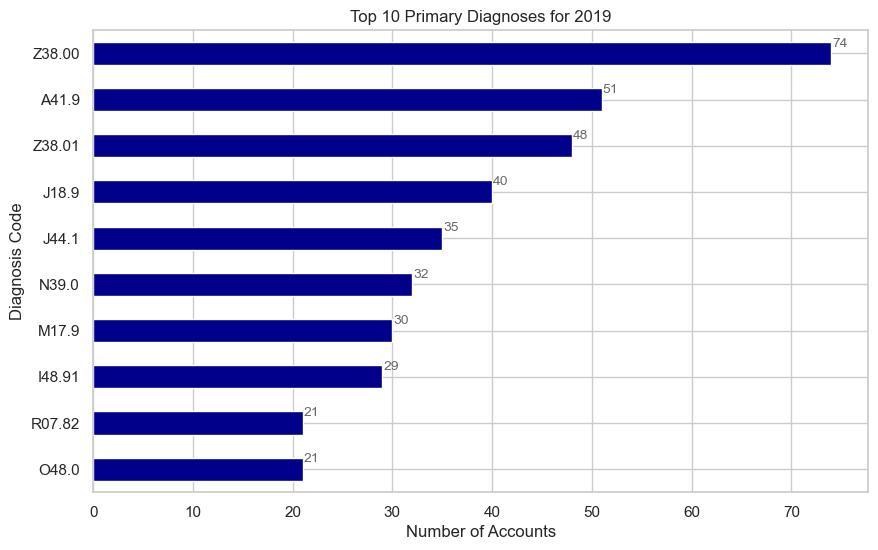

In [743]:
import matplotlib.pyplot as plt

df_2019 = accounts_diag_grouped_join_2019[accounts_diag_grouped_join_2019['Discharge Year'] == 2019]
primary_counts = df_2019['primary'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(10, 6))
primary_counts.plot(kind='barh', color='darkblue', ax=ax)

ax.set_title('Top 10 Primary Diagnoses for 2019')
ax.set_xlabel('Number of Accounts')
ax.set_ylabel('Diagnosis Code')

ax.invert_yaxis()
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, 
            str(round((i.get_width()), 2)),
            fontsize=10, color='dimgrey')

# Display the plot
plt.show()


In [634]:
accounts_diag_grouped_join_2019['primary'].mode().values[0]
# Most common Primary Diagnosis

'Z38.00'

### Most common Primary Diagnosis - Z38.00 with 74 number of accounts

.

### SECONDARY DIAGNOSIS

In [635]:
def expand_list(row):
    row_list = row.split(',')
    return row_list

In [636]:
accounts_diag_grouped_join_2019['secondary']=accounts_diag_grouped_join_2019['secondary'].apply(expand_list)

/var/folders/4w/gzwnglt575713rq2s0x__2_r0000gn/T/ipykernel_58498/1569995815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accounts_diag_grouped_join_2019['secondary']=accounts_diag_grouped_join_2019['secondary'].apply(expand_list)


In [637]:
secondary_list = []
for item in accounts_diag_grouped_join_2019['secondary'].values:
    secondary_list = secondary_list+item

In [638]:
secondary_list

['Z23',
 'Z37.0',
 'Z37.0',
 'O36.5110',
 'O71.2',
 'O70.1',
 'O24.419',
 'Z37.0',
 'I10',
 'L03.119',
 'I48.91',
 'F03.90',
 'Z66',
 'M12.9',
 'J44.9',
 'I10',
 'E03.9',
 'Z79.01',
 'J18.9',
 'J80',
 'L89.139',
 'E87.2',
 'M62.82',
 'E08.42',
 'Z68.43',
 'C66.9',
 'N20.1',
 'N39.0',
 'Z23',
 'G57.00',
 'N13.30',
 'I12.9',
 'J10.1',
 'E11.40',
 'E66.01',
 'N26.9',
 'E86.0',
 'S30.0XXA',
 'I50.33',
 'E87.4',
 'J96.10',
 'R18.8',
 'Z99.81',
 'Z68.41',
 'I50.814',
 'I25.10',
 'D50.9',
 'E11.65',
 'I10',
 'E78.4',
 'E07.9',
 'R97.1',
 'G47.33',
 'E87.5',
 'F32.9',
 'E66.01',
 'I25.2',
 'F17.200',
 'Z66',
 'Z91.19',
 'Z79.02',
 'Z79.82',
 'Z98.61',
 'J69.0',
 'N17.9',
 'I69.920',
 'E78.4',
 'K21.9',
 'E86.0',
 'K56.41',
 'N18.9',
 'I12.9',
 'I69.898',
 'M62.81',
 'I11.9',
 'K21.9',
 'E78.2',
 'Z86.010',
 'I49.1',
 'Z85.22',
 'Z96.649',
 'Z87.891',
 'D62',
 'J96.10',
 'M32.10',
 'R04.2',
 'J44.1',
 'Z99.81',
 'E78.4',
 'R07.9',
 'F41.9',
 'R33.9',
 'K59.00',
 'Z87.891',
 '',
 'C78.7',
 'D68.

In [639]:
second_count = pd.Series(secondary_list)

In [640]:
second_count.mode()

0    I10
dtype: object

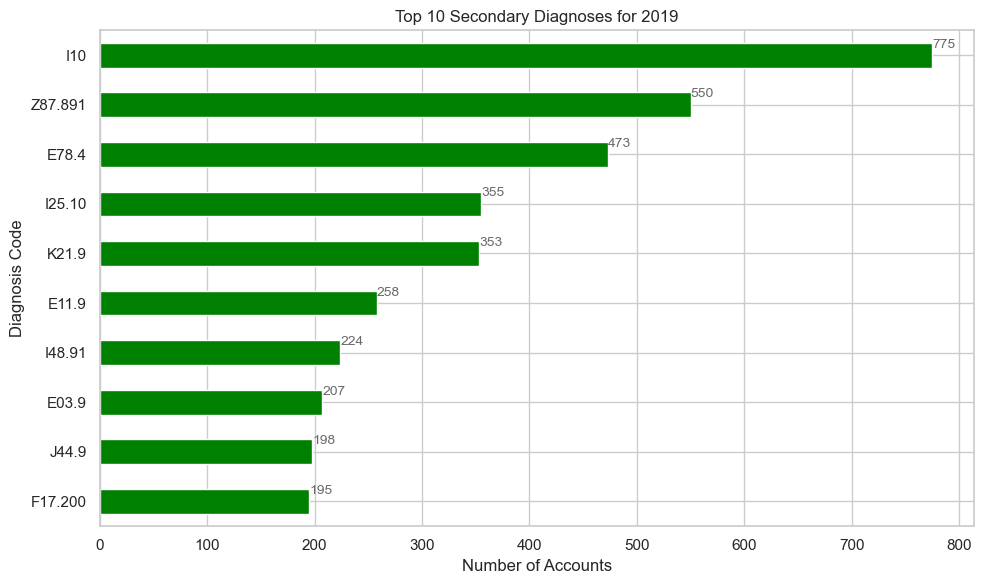

In [744]:
import matplotlib.pyplot as plt

# Assuming df_exploded is already created and contains the 'secondary' column
secondary_counts = df_exploded['secondary'].value_counts().head(10)

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
secondary_counts.plot(kind='barh', color='green', ax=ax)

# Add title and labels
ax.set_title('Top 10 Secondary Diagnoses for 2019')
ax.set_xlabel('Number of Accounts')
ax.set_ylabel('Diagnosis Code')

# Invert the y-axis to have the highest count at the top
ax.invert_yaxis()

# Iterate over the bars and add text labels
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1,
            str(i.get_width()), 
            fontsize=10, color='dimgrey')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Most common Secondary Diagnosis I10 with a count of 775 accounts

.

.

# Question 2

In [642]:
lookup_drg= pd.read_csv(REF_DATA+'/lookup_table_MS DRG.csv')

In [643]:
account_charges = pd.merge(accounts, charges, on="Account ID")

In [644]:
accdrg=pd.merge(lookup_drg,account_charges, on="MS DRG Code")

In [645]:
accdrg

,MS DRG Code,MS DRG,MS DRG Description,CMS MS DRG Weight,Geometric Mean LOS,Arithmetic Mean LOS,Account ID,Admit Date,Attending Provider ID,Discharge Date,Discharge Year,Facility Code,LOS,Patient ZipCode,Charge Code,Charge Department Code,Service Date,Posting Date,Charge Transaction ID,Total Charges
0,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,PHY_001218,2018-03-10,2018,F_0116,51,44333,155179,DPT_0207,2018-01-18,2018-01-18,62307775,0.00
1,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,PHY_001218,2018-03-10,2018,F_0116,51,44333,155179,DPT_0207,2018-01-18,2018-01-18,62307827,0.00
2,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,PHY_001218,2018-03-10,2018,F_0116,51,44333,155181,DPT_0207,2018-01-18,2018-01-18,62307953,0.00
3,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,PHY_001218,2018-03-10,2018,F_0116,51,44333,155179,DPT_0207,2018-01-18,2018-01-18,62334691,0.00
4,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,PHY_001218,2018-03-10,2018,F_0116,51,44333,155179,DPT_0207,2018-01-18,2018-01-18,62334694,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828856,989,989 - NON-EXTENSIVE O.R. PROCEDURES UNRELATED ...,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,1.1236,2.3,3.0,A_0003221451,2018-07-25,PHY_002021,2018-07-26,2018,F_0120,1,43215,155179,DPT_0707,2018-07-26,2018-07-26,83458727,5.05
828857,989,989 - NON-EXTENSIVE O.R. PROCEDURES UNRELATED ...,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,1.1236,2.3,3.0,A_0003221451,2018-07-25,PHY_002021,2018-07-26,2018,F_0120,1,43215,169445,DPT_0684,2018-07-25,2018-07-26,83461977,7452.00
828858,989,989 - NON-EXTENSIVE O.R. PROCEDURES UNRELATED ...,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,1.1236,2.3,3.0,A_0003221451,2018-07-25,PHY_002021,2018-07-26,2018,F_0120,1,43215,155181,DPT_0707,2018-07-26,2018-07-26,83431954,86.90
828859,989,989 - NON-EXTENSIVE O.R. PROCEDURES UNRELATED ...,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,1.1236,2.3,3.0,A_0003221451,2018-07-25,PHY_002021,2018-07-26,2018,F_0120,1,43215,155181,DPT_0707,2018-07-26,2018-07-26,83475697,86.90


In [646]:
total_charges_avg = accdrg.groupby(['MS DRG','MS DRG Code']).agg({
     'Account ID': 'nunique',
    'Total Charges': 'sum',  # This calculates the mean LOS for each service line
}).reset_index()

In [647]:
total_charges_avg.sort_values(by="Total Charges",ascending=False)

,MS DRG,MS DRG Code,Account ID,Total Charges
253,470 - MAJOR HIP AND KNEE JOINT REPLACEMENT OR ...,470,121,5813574.87
423,871 - SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >...,871,73,4386205.89
211,"392 - ESOPHAGITIS, GASTROENTERITIS AND MISCELL...",392,125,2411300.03
121,247 - PERCUTANEOUS CARDIOVASCULAR PROCEDURES W...,247,28,2196799.33
389,807 - VAGINAL DELIVERY WITHOUT STERILIZATION O...,807,161,2077262.06
...,...,...,...,...
266,489 - KNEE PROCEDURES WITHOUT PRINCIPAL DIAGNO...,489,1,0.00
249,466 - REVISION OF HIP OR KNEE REPLACEMENT WITH...,466,1,0.00
282,518 - BACK AND NECK PROCEDURES EXCEPT SPINAL F...,518,1,0.00
184,353 - HERNIA PROCEDURES EXCEPT INGUINAL AND FE...,353,1,0.00


In [648]:
total_charges_avg['Charge_avg']= total_charges_avg['Total Charges']/total_charges_avg['Account ID']

In [649]:
total_charges_avg.sort_values(by="Charge_avg",ascending=False)

,MS DRG,MS DRG Code,Account ID,Total Charges,Charge_avg
1,004 - TRACHEOSTOMY WITH MV >96 HOURS OR PRINCI...,4,3,1890130.19,630043.396667
0,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,3,4,1792906.38,448226.595000
338,652 - KIDNEY TRANSPLANT,652,1,420861.48,420861.480000
437,915 - ALLERGIC REACTIONS WITH MCC,915,1,321572.91,321572.910000
131,266 - ENDOVASCULAR CARDIAC VALVE REPLACEMENT A...,266,1,291848.07,291848.070000
...,...,...,...,...,...
282,518 - BACK AND NECK PROCEDURES EXCEPT SPINAL F...,518,1,0.00,0.000000
171,334 - RECTAL RESECTION WITHOUT CC/MCC,334,1,0.00,0.000000
266,489 - KNEE PROCEDURES WITHOUT PRINCIPAL DIAGNO...,489,1,0.00,0.000000
184,353 - HERNIA PROCEDURES EXCEPT INGUINAL AND FE...,353,1,0.00,0.000000


In [650]:
# highest_avg_charges = sorted_drgs.groupby('MS DRG')['Total Charges'].idxmax()
# highest_avg_table = result.loc[highest_avg_charges]
# highest_avg_table.rename(columns = {"Total Charges":"Highest Average Charge"}, inplace=True)
# print(sorted_drgs)


<Figure size 1200x800 with 0 Axes>

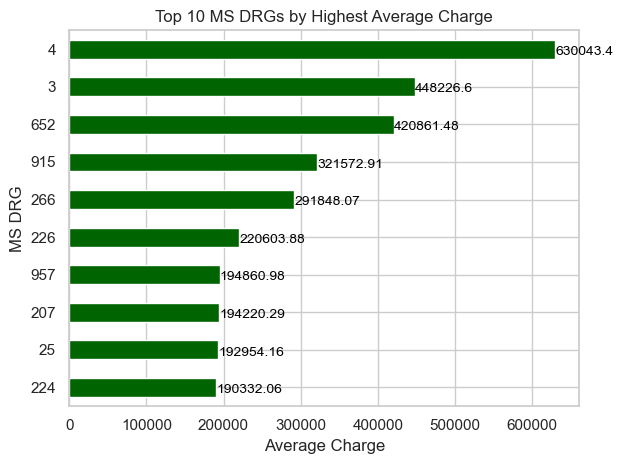

In [751]:
import matplotlib.pyplot as plt

N = 10
top_drgs = total_charges_avg.sort_values('Charge_avg', ascending=False).head(N)

plt.figure(figsize=(12, 8))
ax = top_drgs.sort_values('Charge_avg', ascending=True).plot(kind='barh', x='MS DRG Code', y='Charge_avg', legend=False, color='darkgreen')
plt.title('Top 10 MS DRGs by Highest Average Charge')
plt.xlabel('Average Charge')
plt.ylabel('MS DRG')
for i in ax.patches:
    plt.text(i.get_width() + 0.1, i.get_y() + 0.1, str(round(i.get_width(), 2)), fontsize=10, color='black')
plt.tight_layout()
plt.show()



In [652]:
top_drgs

,MS DRG,MS DRG Code,Account ID,Total Charges,Charge_avg
1,004 - TRACHEOSTOMY WITH MV >96 HOURS OR PRINCI...,4,3,1890130.19,630043.396667
0,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,3,4,1792906.38,448226.595000
338,652 - KIDNEY TRANSPLANT,652,1,420861.48,420861.480000
437,915 - ALLERGIC REACTIONS WITH MCC,915,1,321572.91,321572.910000
131,266 - ENDOVASCULAR CARDIAC VALVE REPLACEMENT A...,266,1,291848.07,291848.070000
106,226 - CARDIAC DEFIBRILLATOR IMPLANT WITHOUT CA...,226,2,441207.75,220603.875000
450,957 - OTHER O.R. PROCEDURES FOR MULTIPLE SIGNI...,957,3,584582.95,194860.983333
98,207 - RESPIRATORY SYSTEM DIAGNOSIS WITH VENTIL...,207,3,582660.87,194220.290000
3,025 - CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL...,25,4,771816.64,192954.160000
105,224 - CARDIAC DEFIBRILLATOR IMPLANT WITH CARDI...,224,1,190332.06,190332.060000


In [653]:

sorted_table = total_charges_avg.sort_values('Charge_avg', ascending=False)
top_diagnosis = sorted_table.iloc[0]['MS DRG']
top_average_charge = sorted_table.iloc[0]['Charge_avg']

print(f"The diagnosis related group with the highest average charge is: {top_diagnosis} with an average charge of {top_average_charge:.2f}")


The diagnosis related group with the highest average charge is: 004 - TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NECK WITHOUT MAJOR O.R. PROCEDURES with an average charge of 630043.40


### The diagnosis related group with the highest average charge is: 004 - TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NECK WITHOUT MAJOR O.R. PROCEDURES with an average charge of 630043.40 USD

.

.

# Question 3

In [654]:
lookup_provider = pd.read_csv(REF_DATA+'/lookup_table_provider.csv')

In [655]:
lookup_prov_account = pd.merge(accounts, lookup_provider, left_on="Attending Provider ID", right_on="Provider ID")

In [656]:
lookup_prov_account.drop(columns=['Attending Provider ID'],inplace=True)

In [657]:
lookup_prov_account

,Account ID,Admit Date,Discharge Date,Discharge Year,Facility Code,LOS,MS DRG Code,Patient ZipCode,Provider ID,Provider name,Provider Service
0,A_0002545965,2018-03-12,2018-03-14,2018,F_0120,2,807,45069,PHY_026231,"Lowe, I",NaN
1,A_0002848549,2018-02-01,2018-02-03,2018,F_0120,2,807,45459,PHY_026231,"Lowe, I",NaN
2,A_0002859859,2018-02-07,2018-02-09,2018,F_0120,2,786,44256,PHY_026231,"Lowe, I",NaN
3,A_0003116411,2018-05-23,2018-05-26,2018,F_0120,3,807,44256,PHY_026231,"Lowe, I",NaN
4,A_0003376317,2018-10-25,2018-10-27,2018,F_0120,2,807,44256,PHY_026231,"Lowe, I",NaN
...,...,...,...,...,...,...,...,...,...,...,...
3469,A_0004360840,2019-12-13,2019-12-15,2019,F_0116,2,418,45011,PHY_005172,"Rios, I",Internal Medicine
3470,A_0004298761,2019-11-16,2019-11-18,2019,F_0120,2,795,44256,PHY_004939,"Lawrence, T",Neonatology
3471,A_0004299071,2019-12-14,2019-12-18,2019,F_0117,4,193,44035,PHY_005230,"Ortega, K",Internal Medicine
3472,A_0004336215,2019-12-09,2019-12-12,2019,F_0117,3,602,43215,PHY_005230,"Ortega, K",Internal Medicine


In [658]:
lookup_prov_account['Admit Date'] = pd.to_datetime(lookup_prov_account['Admit Date'])

In [659]:
dec_2018_dates = lookup_prov_account[(lookup_prov_account['Admit Date'].dt.year == 2018) & (lookup_prov_account['Admit Date'].dt.month == 12)]

In [660]:
dec_2018_dates

,Account ID,Admit Date,Discharge Date,Discharge Year,Facility Code,LOS,MS DRG Code,Patient ZipCode,Provider ID,Provider name,Provider Service
14,A_0003485199,2018-12-21,2018-12-23,2018,F_0117,2,786,44124,PHY_003941,"Greene, S",OB/Gyn
116,A_0003476104,2018-12-17,2018-12-18,2018,F_0119,1,918,44145,PHY_003777,"Cunningham, H",Internal Medicine
117,A_0003477478,2018-12-22,2018-12-25,2018,F_0119,3,190,44130,PHY_003777,"Cunningham, H",Internal Medicine
119,A_0003499887,2018-12-05,2018-12-08,2018,F_0119,3,195,44512,PHY_003777,"Cunningham, H",Internal Medicine
120,A_0003505314,2018-12-28,2018-12-31,2018,F_0119,3,153,44130,PHY_003777,"Cunningham, H",Internal Medicine
...,...,...,...,...,...,...,...,...,...,...,...
3147,A_0003524319,2018-12-02,2018-12-05,2018,F_0119,3,690,45202,PHY_004668,"Frank, U",Family Medicine
3151,A_0003559033,2018-12-26,2018-12-27,2018,F_0116,1,69,43215,PHY_004668,"Frank, U",Family Medicine
3169,A_0003527403,2018-12-04,2018-12-05,2018,F_0119,1,392,45011,PHY_003285,"Sims, N",Internal Medicine
3181,A_0003557533,2018-12-26,2018-12-28,2018,F_0119,2,807,45242,PHY_026223,"Vaughn, Y",NaN


In [661]:
result=dec_2018_dates.groupby(['Provider ID'])['Account ID'].count().sort_values(ascending=False).reset_index()
result


,Provider ID,Account ID
0,PHY_003777,10
1,PHY_003243,7
2,PHY_003065,6
3,PHY_002913,6
4,PHY_004668,5
...,...,...
92,PHY_002410,1
93,PHY_002386,1
94,PHY_002321,1
95,PHY_002262,1


In [731]:


provider_max = result['Provider ID'].iloc[0]
max_acc = result['Account ID'].iloc[0]

print(f"Attending Provider ID which had the highest volume of accounts in the month of December in 2018: {provider_max}")
print(f"Volume of Accounts: {max_acc}")


Attending Provider ID which had the highest volume of accounts in the month of December in 2018: PHY_003777
Volume of Accounts: 10


### Attending Provider ID which had the highest volume of accounts in the month of December in 2018: PHY_003777
### Volume of Accounts: 10

/var/folders/4w/gzwnglt575713rq2s0x__2_r0000gn/T/ipykernel_58498/3247796567.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Provider'] = df['Provider ID']


<Figure size 1200x800 with 0 Axes>

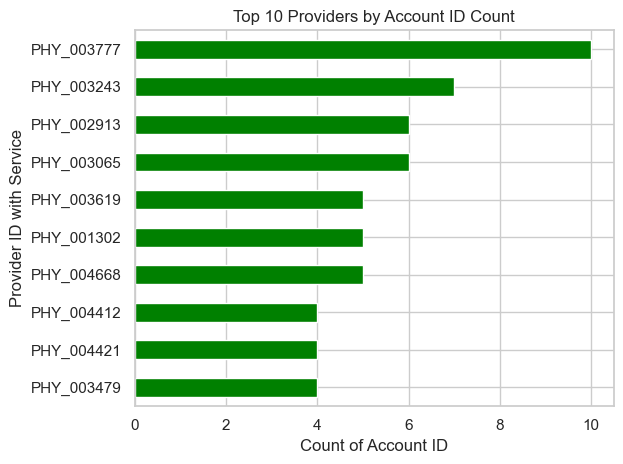

In [664]:
import seaborn as sns
import matplotlib.pyplot as plt

N = 10
df = result.head(N)

# Plotting
plt.figure(figsize=(12, 8))
df['Provider'] = df['Provider ID'] 
df.sort_values(by='Account ID', ascending=True).plot(kind='barh', x='Provider', y='Account ID', legend=False, color='green')
plt.title('Top 10 Providers by Account ID Count')
plt.xlabel('Count of Account ID')
plt.ylabel('Provider ID with Service')
plt.tight_layout()
plt.show()


In [665]:
result_service=dec_2018_dates.groupby(['Provider Service'])['Account ID'].count().sort_values(ascending=False).reset_index()

In [666]:
result_service

,Provider Service,Account ID
0,Internal Medicine,77
1,Family Medicine,30
2,Pediatrics,19
3,OB/Gyn,9
4,Neonatology,3
5,Neurosurgery,3
6,Orthopedic Surgery,2
7,Thoracic Surgery,2
8,Pulmonary Medicine,2
9,Emergency Medicine,2


In [668]:
provider_service_max = result_service['Provider Service'].iloc[0]
max_serv_acc = result_service['Account ID'].iloc[0]

print(f"Attending Provider Service which had the highest volume of accounts in the month of December in 2018: {provider_service_max}")
print(f"Volume of Accounts: {max_serv_acc}")

Attending Provider Service which had the highest volume of accounts in the month of December in 2018: Internal Medicine
Volume of Accounts: 77


### Attending Provider Service which had the highest volume of accounts in the month of December in 2018: Internal Medicine
### Volume of Accounts: 77

/var/folders/4w/gzwnglt575713rq2s0x__2_r0000gn/T/ipykernel_58498/280241852.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Provider'] =  df['Provider Service']


<Figure size 1200x800 with 0 Axes>

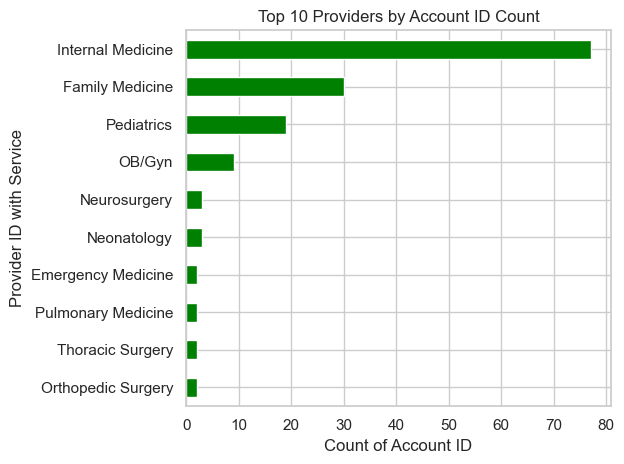

In [669]:
import seaborn as sns
import matplotlib.pyplot as plt

N = 10
df = result_service.head(N)

# Plotting
plt.figure(figsize=(12, 8))
df['Provider'] =  df['Provider Service']
df.sort_values(by='Account ID', ascending=True).plot(kind='barh', x='Provider', y='Account ID', legend=False, color='green')
plt.title('Top 10 Providers by Account ID Count')
plt.xlabel('Count of Account ID')
plt.ylabel('Provider ID with Service')
plt.tight_layout()
plt.show()


.

.

# Question 4

In [670]:
acc['Admit Date'] = pd.to_datetime(acc['Admit Date'])
acc['Discharge Date'] = pd.to_datetime(acc['Discharge Date'])

In [671]:
acc['length_of_stay'] = acc['LOS']
acc['Discharge Year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
3469    2019
3470    2019
3471    2019
3472    2019
3473    2019
Name: Discharge Year, Length: 3474, dtype: int64

In [672]:
acc['Discharge Year'] = acc['Discharge Year'].astype(int)

In [752]:
acc = acc[acc['length_of_stay'] >= 0]
acc
lookup_facility = pd.read_csv(REF_DATA+'/lookup_table_facility.csv')
facilitymerge=pd.merge(lookup_facility,acc,on="Facility Code")

In [753]:
facilitymerge.groupby(['Facility Code','Facility Name','Discharge Year'])['length_of_stay'].mean().reset_index().sort_values(['Discharge Year'],ascending=False)

,Facility Code,Facility Name,Discharge Year,length_of_stay
1,F_0116,SPRINGFIELD HOSPITAL,2019,5.113433
3,F_0117,LONGWOOD,2019,3.696113
5,F_0119,MAPLEWOOD HOSPITAL,2019,3.839888
7,F_0120,TRINITY HOSPITAL,2019,4.577068
0,F_0116,SPRINGFIELD HOSPITAL,2018,4.830508
2,F_0117,LONGWOOD,2018,3.795841
4,F_0119,MAPLEWOOD HOSPITAL,2018,4.641667
6,F_0120,TRINITY HOSPITAL,2018,4.051896


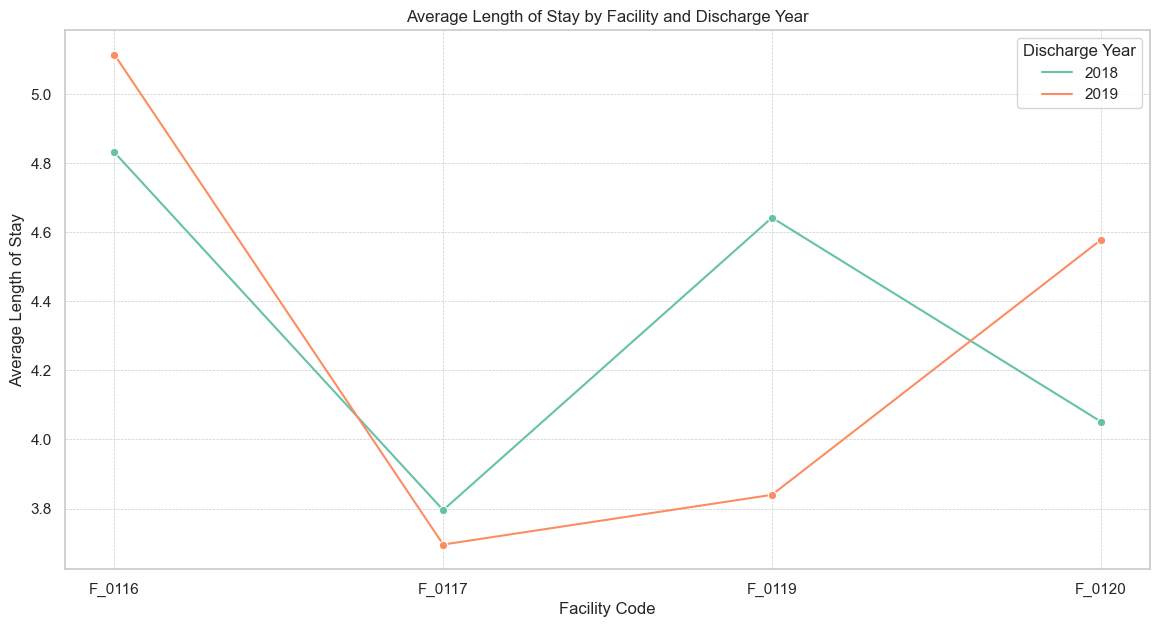

In [675]:
import seaborn as sns
import matplotlib.pyplot as plt

df = acc.groupby(['Facility Code','Discharge Year'])['length_of_stay'].mean().reset_index().sort_values(['Facility Code', 'Discharge Year'],ascending=True)


plt.figure(figsize=(14, 7))
sns.lineplot(x='Facility Code', y='length_of_stay', hue='Discharge Year', marker="o", data=df, palette="Set2")
plt.title('Average Length of Stay by Facility and Discharge Year')
plt.ylabel('Average Length of Stay')
plt.legend(title='Discharge Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



# Question 5

In [676]:
lookup_msdrg = pd.read_csv(REF_DATA+'/lookup_table_MS DRG.csv')
lookup_msdrg_service_line = pd.read_csv(REF_DATA+'/lookup_table_MS DRG Service Line.csv')

In [677]:
msdrg_service_merge = pd.merge(lookup_msdrg,lookup_msdrg_service_line, on="MS DRG Code")

In [678]:
msdrg_service_accounts_merge = pd.merge(accounts, msdrg_service_merge, on = 'MS DRG Code')

In [679]:
msdrg_service_accounts_merge.sort_values(by="Arithmetic Mean LOS",ascending=False)


,Account ID,Admit Date,Attending Provider ID,Discharge Date,Discharge Year,Facility Code,LOS,MS DRG Code,Patient ZipCode,MS DRG,MS DRG Description,CMS MS DRG Weight,Geometric Mean LOS,Arithmetic Mean LOS,Service Line Description
1030,A_0002760978,2018-01-18,PHY_001218,2018-03-10,2018,F_0116,51,3,44333,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,SURGICAL TRACHEOSTOM
1032,A_0003644902,2019-03-07,PHY_004768,2019-04-17,2019,F_0116,41,3,43017,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,SURGICAL TRACHEOSTOM
1031,A_0002912279,2018-03-29,PHY_003446,2018-04-27,2018,F_0119,29,3,44512,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,SURGICAL TRACHEOSTOM
1033,A_0004352490,2019-12-09,PHY_001218,2019-12-18,2019,F_0116,9,3,44256,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,SURGICAL TRACHEOSTOM
285,A_0003797520,2019-04-04,PHY_002056,2019-06-17,2019,F_0116,74,4,45069,004 - TRACHEOSTOMY WITH MV >96 HOURS OR PRINCI...,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...,11.9225,20.0,24.6,SURGICAL TRACHEOSTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,A_0003181386,2018-08-02,PHY_018802,2018-08-05,2018,F_0117,3,39,44256,039 - EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,1.1391,1.2,1.4,VASCULAR SURGERY
2623,A_0003145669,2018-07-07,PHY_003479,2018-07-12,2018,F_0120,5,39,44256,039 - EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,1.1391,1.2,1.4,VASCULAR SURGERY
2622,A_0002971130,2018-04-11,PHY_002913,2018-04-18,2018,F_0117,7,39,44122,039 - EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,1.1391,1.2,1.4,VASCULAR SURGERY
2621,A_0002943514,2018-04-10,PHY_001012,2018-04-11,2018,F_0117,1,39,43017,039 - EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,1.1391,1.2,1.4,VASCULAR SURGERY


In [680]:
# Assuming 'msdrg_service_accounts_merge' is your DataFrame
stay_len = msdrg_service_accounts_merge.groupby(['Service Line Description']).agg({
    'LOS': 'mean',  
    'Account ID': 'nunique',  
    'Arithmetic Mean LOS': 'mean'  
}).reset_index()


In [681]:
stay_len

,Service Line Description,LOS,Account ID,Arithmetic Mean LOS
0,CARDIAC CATHS,2.852941,34,3.617647
1,CARDIOLOGY,3.240449,445,3.281798
2,DERMATOLOGY,4.024691,81,4.003704
3,ENDOCRINOLOGY,3.376471,85,3.394118
4,GASTROENTEROLOGY,3.797260,365,3.703014
5,GENERAL MEDICINE,6.094595,222,5.176126
6,GENERAL SURGERY,6.700935,214,5.749533
7,GYNECOLOGY,2.647059,34,2.623529
8,HIV,5.900000,10,6.110000
9,MAJOR JOINT PROCEDURE,2.602649,151,2.096026


In [682]:
stay_len.sort_values('Arithmetic Mean LOS', ascending=False)

,Service Line Description,LOS,Account ID,Arithmetic Mean LOS
25,SURGICAL TRACHEOSTOM,45.375000,8,26.050000
17,OPEN HEART,7.512821,39,7.889744
26,THORACIC SURGERY,8.315789,19,7.010526
8,HIV,5.900000,10,6.110000
6,GENERAL SURGERY,6.700935,214,5.749533
28,VASCULAR SURGERY,6.586957,46,5.719565
21,PSYCHIATRY,3.829268,41,5.560976
5,GENERAL MEDICINE,6.094595,222,5.176126
10,NEONATOLOGY,7.758621,29,5.103448
18,OTHER,5.153061,98,5.038776


In [683]:
stay_len['difference']=stay_len['LOS']-stay_len['Arithmetic Mean LOS']

In [684]:
# length_merge
stay_len

,Service Line Description,LOS,Account ID,Arithmetic Mean LOS,difference
0,CARDIAC CATHS,2.852941,34,3.617647,-0.764706
1,CARDIOLOGY,3.240449,445,3.281798,-0.041348
2,DERMATOLOGY,4.024691,81,4.003704,0.020988
3,ENDOCRINOLOGY,3.376471,85,3.394118,-0.017647
4,GASTROENTEROLOGY,3.797260,365,3.703014,0.094247
5,GENERAL MEDICINE,6.094595,222,5.176126,0.918468
6,GENERAL SURGERY,6.700935,214,5.749533,0.951402
7,GYNECOLOGY,2.647059,34,2.623529,0.023529
8,HIV,5.900000,10,6.110000,-0.210000
9,MAJOR JOINT PROCEDURE,2.602649,151,2.096026,0.506623


In [685]:
stay_len.sort_values('difference', ascending=False)

,Service Line Description,LOS,Account ID,Arithmetic Mean LOS,difference
25,SURGICAL TRACHEOSTOM,45.375000,8,26.050000,19.325000
10,NEONATOLOGY,7.758621,29,5.103448,2.655172
26,THORACIC SURGERY,8.315789,19,7.010526,1.305263
22,PULMONARY,5.202532,316,4.043354,1.159177
6,GENERAL SURGERY,6.700935,214,5.749533,0.951402
5,GENERAL MEDICINE,6.094595,222,5.176126,0.918468
27,UROLOGY,5.255814,43,4.348837,0.906977
28,VASCULAR SURGERY,6.586957,46,5.719565,0.867391
9,MAJOR JOINT PROCEDURE,2.602649,151,2.096026,0.506623
11,NEPHROLOGY,4.260000,150,4.019333,0.240667


In [686]:
# Find the index of the maximum value in the 'difference' column
max_diff_index = stay_len['difference'].idxmax()

# Get the service line description and maximum difference value using the index
service = stay_len['Service Line Description'].iloc[max_diff_index]
max_diff_value = stay_len['difference'].iloc[max_diff_index]

# Print the results
print(f"The Service Line Description with the highest difference in length of stay is: {service}")
print(f"The maximum difference in length of stay value is: {max_diff_value:.2f}")


The Service Line Description with the highest difference in length of stay is: SURGICAL TRACHEOSTOM
The maximum difference in length of stay value is: 19.32


### The Service Line Description with the highest difference in length of stay is: SURGICAL TRACHEOSTOM
### The maximum difference in length of stay value is: 19.32

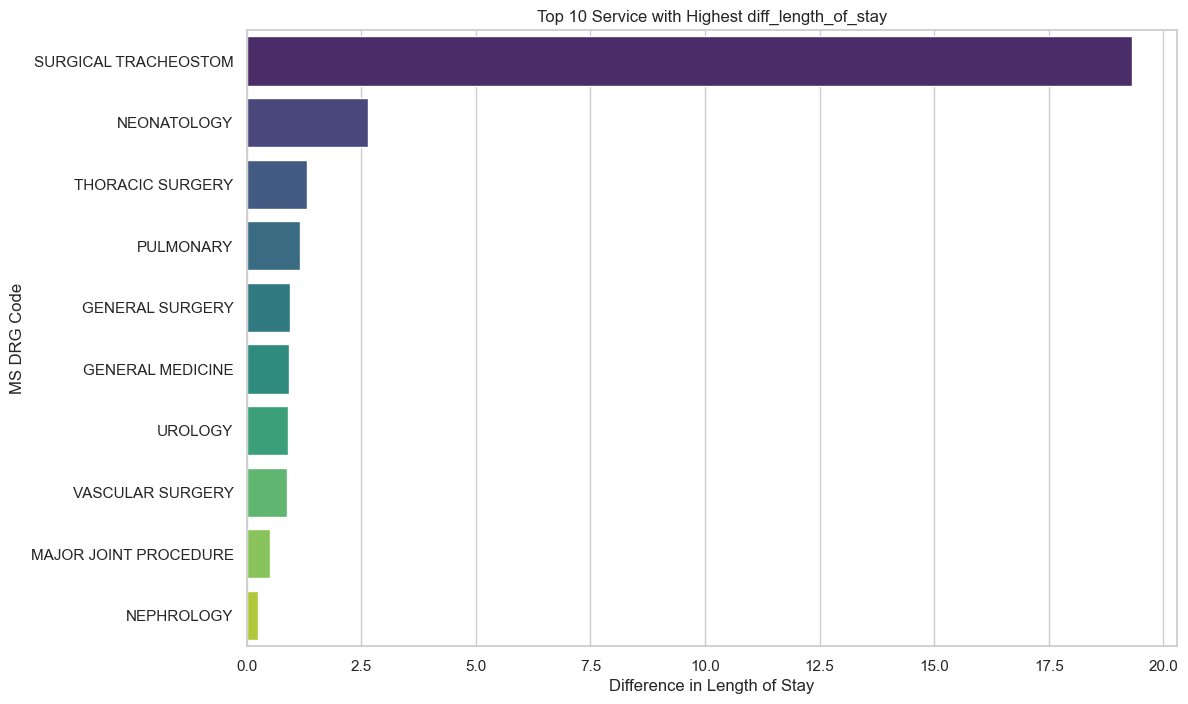

In [687]:
import matplotlib.pyplot as plt
import seaborn as sns


top_10 = stay_len.sort_values(by='difference', ascending=False).head(10)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='difference', y=top_10['Service Line Description'].astype(str), data=top_10, palette="viridis")
plt.xlabel('Difference in Length of Stay')
plt.ylabel('MS DRG Code')
plt.title('Top 10 Service with Highest diff_length_of_stay')
plt.show()


## .

## .

## EXTRA ANALYSIS

In [688]:
extra=accounts_diag_grouped_join
extra = pd.merge(extra, lookup_drg, on="MS DRG Code")

In [754]:
extra

,Account ID,Admit Date,Attending Provider ID,Discharge Date,Discharge Year,Facility Code,LOS,MS DRG Code,Patient ZipCode,Diagnosis Sequence,Diagnosis Code,code_seq_map,primary,secondary,MS DRG,MS DRG Description,CMS MS DRG Weight,Geometric Mean LOS,Arithmetic Mean LOS
0,A_0002545965,2018-03-12,PHY_026231,2018-03-14,2018,F_0120,2,807,45069,"1,2,3","O48.0,O76,Z37.0","{1: 'O48.0', 2: 'O76', 3: 'Z37.0'}",O48.0,"O76,Z37.0",807 - VAGINAL DELIVERY WITHOUT STERILIZATION O...,VAGINAL DELIVERY WITHOUT STERILIZATION OR D&C ...,0.6423,2.1,2.3
1,A_0002725357,2018-01-16,PHY_026418,2018-01-19,2018,F_0120,3,807,44870,"1,2,3","O09.521,O69.2XX0,Z37.0","{1: 'O09.521', 2: 'O69.2XX0', 3: 'Z37.0'}",O09.521,"O69.2XX0,Z37.0",807 - VAGINAL DELIVERY WITHOUT STERILIZATION O...,VAGINAL DELIVERY WITHOUT STERILIZATION OR D&C ...,0.6423,2.1,2.3
2,A_0002742627,2018-03-27,PHY_001040,2018-03-28,2018,F_0119,1,807,44122,"2,1,3","O69.81X0,O70.0,Z37.0","{1: 'O70.0', 2: 'O69.81X0', 3: 'Z37.0'}",O70.0,"O69.81X0,Z37.0",807 - VAGINAL DELIVERY WITHOUT STERILIZATION O...,VAGINAL DELIVERY WITHOUT STERILIZATION OR D&C ...,0.6423,2.1,2.3
3,A_0002749912,2018-01-17,PHY_001134,2018-01-19,2018,F_0117,2,807,44113,"1,2,3","O14.02,O70.0,Z37.0","{1: 'O14.02', 2: 'O70.0', 3: 'Z37.0'}",O14.02,"O70.0,Z37.0",807 - VAGINAL DELIVERY WITHOUT STERILIZATION O...,VAGINAL DELIVERY WITHOUT STERILIZATION OR D&C ...,0.6423,2.1,2.3
4,A_0002764309,2018-01-07,PHY_026555,2018-01-09,2018,F_0117,2,807,45241,"2,3,1,4,5,6,7","D64.9,O69.2XX0,O69.81X0,O99.011,Z23,Z23,Z37.0","{1: 'O69.81X0', 2: 'D64.9', 3: 'O69.2XX0', 4: ...",O69.81X0,"D64.9,O69.2XX0,O99.011,Z23,Z23,Z37.0",807 - VAGINAL DELIVERY WITHOUT STERILIZATION O...,VAGINAL DELIVERY WITHOUT STERILIZATION OR D&C ...,0.6423,2.1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,A_0004300135,2019-12-22,PHY_004158,2019-12-29,2019,F_0117,7,357,45242,"4,6,5,8,9,1,3,2,7","A04.7,E03.9,E44.1,K44.9,K64.8,K65.2,K70.31,K76...","{1: 'K65.2', 2: 'K76.6', 3: 'K70.31', 4: 'A04....",K65.2,"K76.6,K70.31,A04.7,E44.1,E03.9,M06.9,K44.9,K64.8",357 - OTHER DIGESTIVE SYSTEM O.R. PROCEDURES W...,OTHER DIGESTIVE SYSTEM O.R. PROCEDURES WITH CC,2.2685,4.6,5.9
3470,A_0004318050,2019-12-02,PHY_003807,2019-12-03,2019,F_0119,1,270,44512,"9,15,11,17,18,20,21,8,3,16,19,2,12,10,1,5,23,1...","D62,D63.8,D69.59,E03.9,E11.9,E78.5,E86.1,E87.1...","{1: 'I86.4', 2: 'I26.99', 3: 'E87.2', 4: 'K92....",I86.4,"I26.99,E87.2,K92.0,J44.9,K76.6,R18.8,E87.1,D62...",270 - OTHER MAJOR CARDIOVASCULAR PROCEDURES WI...,OTHER MAJOR CARDIOVASCULAR PROCEDURES WITH MCC,5.1870,6.6,9.5
3471,A_0004320283,2019-12-26,PHY_002913,2019-12-26,2019,F_0117,0,262,43215,"2,9,3,1,4,10,8,5,6,7","D69.6,G25.2,I10,T82.120A,Z79.82,Z85.46,Z86.718...","{1: 'T82.120A', 2: 'D69.6', 3: 'I10', 4: 'Z79....",T82.120A,"D69.6,I10,Z79.82,Z87.891,Z95.0,Z96.659,Z86.718...",262 - CARDIAC PACEMAKER REVISION EXCEPT DEVICE...,CARDIAC PACEMAKER REVISION EXCEPT DEVICE REPLA...,1.7062,2.2,2.7
3472,A_0004322228,2019-12-10,PHY_002939,2019-12-25,2019,F_0117,15,744,44256,"9,8,5,1,2,3,4,7,6","D64.9,K59.00,N13.1,N73.8,R18.8,R39.0,S37.19XA,...","{1: 'N73.8', 2: 'R18.8', 3: 'R39.0', 4: 'S37.1...",N73.8,"R18.8,R39.0,S37.19XA,N13.1,Z90.79,Z90.721,K59....","744 - D&C, CONIZATION, LAPAROSCOPY AND TUBAL I...","D&C, CONIZATION, LAPAROSCOPY AND TUBAL INTERRU...",1.7954,4.4,5.9


## Which ZipCode has the highest number of patients recorded?

In [689]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df

# 1. ZipCode with the highest number of patients
zip_counts = extra.groupby('Patient ZipCode')['Account ID'].nunique().sort_values(ascending=False)
highest_zip = zip_counts.idxmax()
highest_count = zip_counts.max()

print(f"ZipCode with highest number of patients: {highest_zip} with {highest_count} patients")




ZipCode with highest number of patients: 45202 with 217 patients


### ZipCode with highest number of patients: 45202 with 217 patients

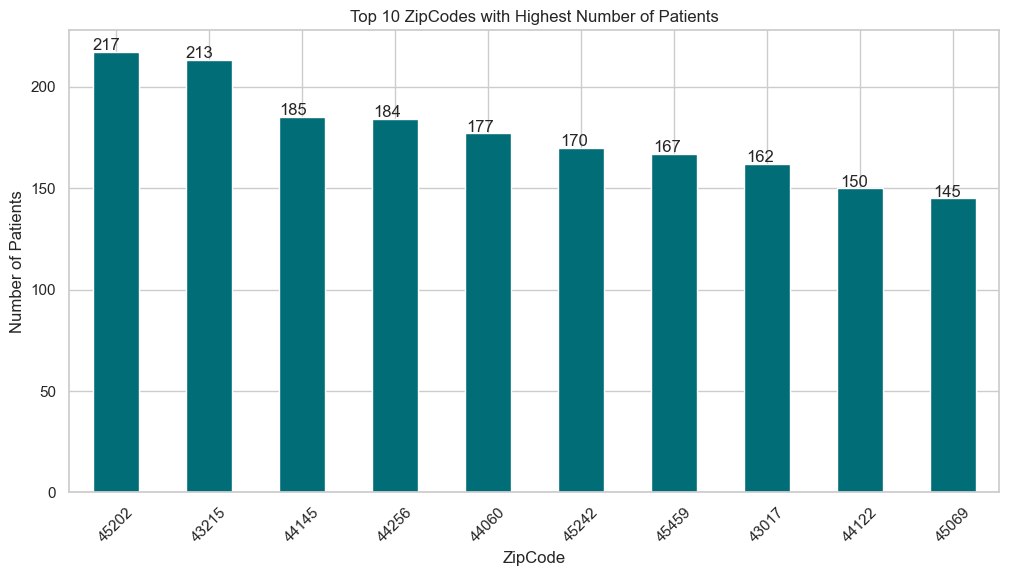

In [755]:
import matplotlib.pyplot as plt
import seaborn as sns

N = 10
fig, ax = plt.subplots(figsize=(12, 6))
zip_counts.head(N).plot(kind='bar', color='#006d77', ax=ax)
plt.title(f'Top {N} ZipCodes with Highest Number of Patients')
plt.ylabel('Number of Patients')
plt.xlabel('ZipCode')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


## Which facility service had the highest revenue ?

In [694]:
lookup_facility = pd.read_csv(REF_DATA+'/lookup_table_facility.csv')

In [695]:
facility_service_merge = pd.merge(lookup_facility,accdrg, on="Facility Code")

In [696]:
facility_service_merge 

,Facility Code,Facility Name,MS DRG Code,MS DRG,MS DRG Description,CMS MS DRG Weight,Geometric Mean LOS,Arithmetic Mean LOS,Account ID,Admit Date,...,Discharge Date,Discharge Year,LOS,Patient ZipCode,Charge Code,Charge Department Code,Service Date,Posting Date,Charge Transaction ID,Total Charges
0,F_0116,SPRINGFIELD HOSPITAL,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,...,2018-03-10,2018,51,44333,155179,DPT_0207,2018-01-18,2018-01-18,62307775,0.00
1,F_0116,SPRINGFIELD HOSPITAL,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,...,2018-03-10,2018,51,44333,155179,DPT_0207,2018-01-18,2018-01-18,62307827,0.00
2,F_0116,SPRINGFIELD HOSPITAL,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,...,2018-03-10,2018,51,44333,155181,DPT_0207,2018-01-18,2018-01-18,62307953,0.00
3,F_0116,SPRINGFIELD HOSPITAL,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,...,2018-03-10,2018,51,44333,155179,DPT_0207,2018-01-18,2018-01-18,62334691,0.00
4,F_0116,SPRINGFIELD HOSPITAL,3,003 - ECMO OR TRACHEOSTOMY WITH MV >96 HOURS O...,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,19.1055,22.4,30.2,A_0002760978,2018-01-18,...,2018-03-10,2018,51,44333,155179,DPT_0207,2018-01-18,2018-01-18,62334694,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828856,F_0120,TRINITY HOSPITAL,989,989 - NON-EXTENSIVE O.R. PROCEDURES UNRELATED ...,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,1.1236,2.3,3.0,A_0003221451,2018-07-25,...,2018-07-26,2018,1,43215,155179,DPT_0707,2018-07-26,2018-07-26,83458727,5.05
828857,F_0120,TRINITY HOSPITAL,989,989 - NON-EXTENSIVE O.R. PROCEDURES UNRELATED ...,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,1.1236,2.3,3.0,A_0003221451,2018-07-25,...,2018-07-26,2018,1,43215,169445,DPT_0684,2018-07-25,2018-07-26,83461977,7452.00
828858,F_0120,TRINITY HOSPITAL,989,989 - NON-EXTENSIVE O.R. PROCEDURES UNRELATED ...,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,1.1236,2.3,3.0,A_0003221451,2018-07-25,...,2018-07-26,2018,1,43215,155181,DPT_0707,2018-07-26,2018-07-26,83431954,86.90
828859,F_0120,TRINITY HOSPITAL,989,989 - NON-EXTENSIVE O.R. PROCEDURES UNRELATED ...,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,1.1236,2.3,3.0,A_0003221451,2018-07-25,...,2018-07-26,2018,1,43215,155181,DPT_0707,2018-07-26,2018-07-26,83475697,86.90


In [697]:
revenue_per_facility = facility_service_merge.groupby(['Facility Code','Facility Name'])['Total Charges'].sum()

In [756]:
sorted_revenue = revenue_per_facility.sort_values(ascending=False)
sorted_revenue.reset_index()

,Facility Code,Facility Name,Total Charges
0,F_0120,TRINITY HOSPITAL,39228315.52
1,F_0117,LONGWOOD,32834154.29
2,F_0116,SPRINGFIELD HOSPITAL,29384170.25
3,F_0119,MAPLEWOOD HOSPITAL,21577521.44


In [724]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming revenue_per_facility is already sorted and reset
# sorted_data = sorted_revenue.reset_index()

# # Setting the Facility Name as the index
# heatmap_data = sorted_data.set_index('Facility Name')['Total Charges']

# # Convert the Series to DataFrame for the heatmap
# heatmap_data = heatmap_data.to_frame()

# # Plotting the heatmap
# plt.figure(figsize=(12,8)) 
# sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='viridis_r', cbar_kws={'label': 'Total Charges'})
# plt.title('Revenue per Facility')
# plt.show()


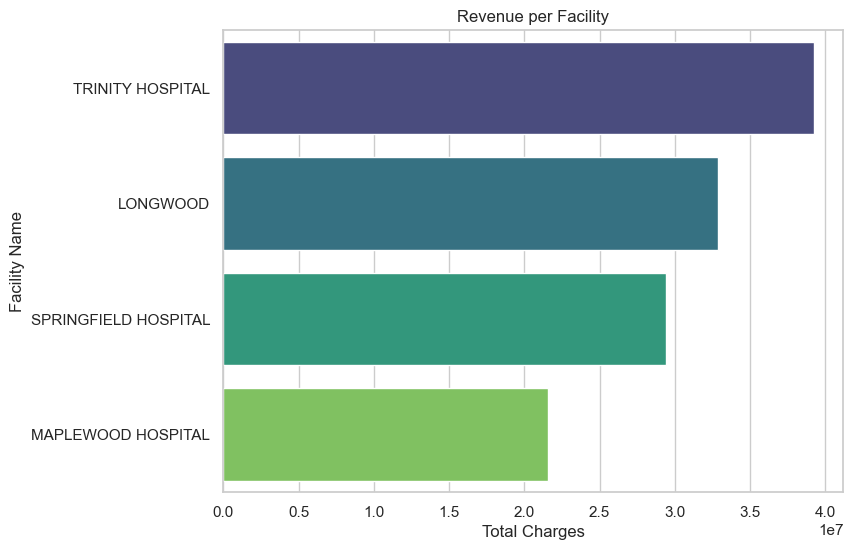

In [718]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_data['Total Charges'], y=sorted_data['Facility Name'].astype(str), data=top_10, palette="viridis")
plt.xlabel('Total Charges')
plt.ylabel('Facility Name')
plt.title('Revenue per Facility')
plt.show()

In [700]:
highest_revenue_facility = revenue_per_facility.idxmax()
highest_revenue = revenue_per_facility.max()

print(f"The facility {highest_revenue_facility} had the highest revenue of ${highest_revenue}.")

The facility ('F_0120', 'TRINITY HOSPITAL') had the highest revenue of $39228315.52.


### TRINITY HOSPITAL (F_0120) had the highest revenue of $39228315.52

## Who provided the most treatments ?

In [701]:
facility_merge = pd.merge(lookup_facility,accdrg, on="Facility Code")

In [702]:
lookup_charges = pd.read_csv(REF_DATA+'/lookup_table_charge.csv')

In [703]:
charges_merge=pd.merge(lookup_charges,facility_merge, on="Charge Code")

In [704]:
fac_prov_merge = pd.merge(charges_merge,lookup_provider, left_on="Attending Provider ID", right_on="Provider ID")

In [705]:
fac_prov_merge.drop(columns=['Attending Provider ID'],inplace=True)

In [706]:
fac_prov_merge

,Charge Code,Charge Description,Facility Code,Facility Name,MS DRG Code,MS DRG,MS DRG Description,CMS MS DRG Weight,Geometric Mean LOS,Arithmetic Mean LOS,...,LOS,Patient ZipCode,Charge Department Code,Service Date,Posting Date,Charge Transaction ID,Total Charges,Provider ID,Provider name,Provider Service
0,170219.0,HC ULT SONOGRAM SPINE,F_0117,LONGWOOD,794,794 - NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,1.4084,3.4,3.4,...,2,44113,DPT_0302,2019-01-27,2019-01-27,102182655,556.0,PHY_000672,"Bailey, S",Pediatrics
1,135265.0,HC ADMIN HEPATITIS B VACCINE,F_0117,LONGWOOD,794,794 - NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,1.4084,3.4,3.4,...,2,44113,DPT_0335,2019-01-25,2019-01-25,102070320,92.0,PHY_000672,"Bailey, S",Pediatrics
2,135265.0,HC ADMIN HEPATITIS B VACCINE,F_0117,LONGWOOD,794,794 - NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,1.4084,3.4,3.4,...,2,44113,DPT_0335,2019-01-25,2019-01-26,102142555,92.0,PHY_000672,"Bailey, S",Pediatrics
3,135265.0,HC ADMIN HEPATITIS B VACCINE,F_0117,LONGWOOD,794,794 - NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,1.4084,3.4,3.4,...,2,44113,DPT_0335,2019-01-25,2019-01-26,102142560,-92.0,PHY_000672,"Bailey, S",Pediatrics
4,135265.0,HC ADMIN HEPATITIS B VACCINE,F_0117,LONGWOOD,795,795 - NORMAL NEWBORN,NORMAL NEWBORN,0.1907,3.1,3.1,...,2,45040,DPT_0336,2019-01-16,2019-01-16,98244434,92.0,PHY_000672,"Bailey, S",Pediatrics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828856,351645.0,HC LAB CBC (NO DIFF)*,F_0117,LONGWOOD,848,848 - CHEMOTHERAPY WITHOUT ACUTE LEUKEMIA AS S...,CHEMOTHERAPY WITHOUT ACUTE LEUKEMIA AS SECONDA...,1.0323,3.0,3.5,...,1,45840,DPT_0370,2019-03-28,2019-03-28,108851829,-36.0,PHY_001260,"Jenkins, P",Pediatric Hematology/Oncology
828857,155181.0,HC RX - DRUGS REQUIRING DETAILED CODING,F_0119,MAPLEWOOD HOSPITAL,661,661 - KIDNEY AND URETER PROCEDURES FOR NON-NEO...,KIDNEY AND URETER PROCEDURES FOR NON-NEOPLASM ...,1.0637,1.9,2.2,...,1,44130,DPT_0453,2019-03-19,2019-03-19,105489808,0.0,PHY_004185,"Patterson, M",Urologic Surgery
828858,155181.0,HC RX - DRUGS REQUIRING DETAILED CODING,F_0119,MAPLEWOOD HOSPITAL,661,661 - KIDNEY AND URETER PROCEDURES FOR NON-NEO...,KIDNEY AND URETER PROCEDURES FOR NON-NEOPLASM ...,1.0637,1.9,2.2,...,1,44130,DPT_0453,2019-03-19,2019-03-19,105548462,0.0,PHY_004185,"Patterson, M",Urologic Surgery
828859,155181.0,HC RX - DRUGS REQUIRING DETAILED CODING,F_0119,MAPLEWOOD HOSPITAL,661,661 - KIDNEY AND URETER PROCEDURES FOR NON-NEO...,KIDNEY AND URETER PROCEDURES FOR NON-NEOPLASM ...,1.0637,1.9,2.2,...,1,44130,DPT_0453,2019-03-19,2019-03-19,105548512,0.0,PHY_004185,"Patterson, M",Urologic Surgery


In [707]:
provider_treatments = fac_prov_merge.groupby(['Provider name','Facility Name'])['Charge Description'].nunique().sort_values(ascending=False)

# To get the provider and facility with the most treatments:
top_provider, top_facility = provider_treatments.idxmax()
top_count = provider_treatments.max()

print(f"The provider {top_provider} at facility {top_facility} provided the most treatments with a total of {top_count} unique charge descriptions.")


The provider Coffey, S at facility LONGWOOD provided the most treatments with a total of 685 unique charge descriptions.


In [758]:
provider_treatments.reset_index()

,Provider name,Facility Name,Charge Description
0,"Coffey, S",LONGWOOD,685
1,"Cummings, Q",TRINITY HOSPITAL,621
2,"Cunningham, H",MAPLEWOOD HOSPITAL,548
3,"Maddox, V",LONGWOOD,525
4,"Bright, M",SPRINGFIELD HOSPITAL,471
...,...,...,...
531,"Santos, U",LONGWOOD,4
532,"Mullen, F",MAPLEWOOD HOSPITAL,3
533,"Fowler, F",LONGWOOD,3
534,"Patterson, M",MAPLEWOOD HOSPITAL,2


### The provider Coffey, S at facility LONGWOOD provided the most treatments with a total of 685 unique charge descriptions.

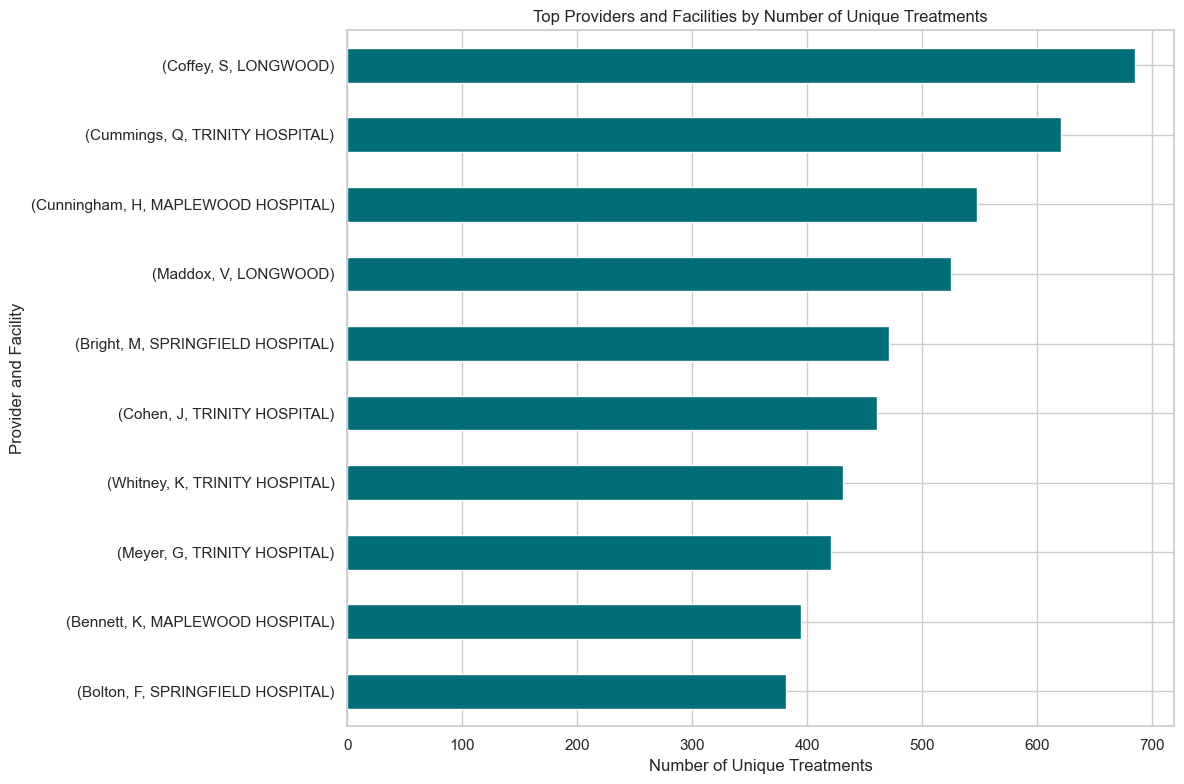

In [708]:
import matplotlib.pyplot as plt

N = 10
top_provider_treatments = provider_treatments.head(N)
plt.figure(figsize=(12, 8))
top_provider_treatments.sort_values().plot(kind='barh', color='#006d77')
plt.title('Top Providers and Facilities by Number of Unique Treatments')
plt.xlabel('Number of Unique Treatments')
plt.ylabel('Provider and Facility')
plt.tight_layout()
plt.show()



## Which were the most common charge descriptions/prescriptions that were given to patients?

In [740]:
most_common = charges_merge.groupby('Charge Description')['Account ID'].count().sort_values(ascending=False)


In [759]:
most_common.reset_index()

,Charge Description,Account ID
0,HC RX - SELF ADMINISTERABLE DRUGS,174704
1,HC RX - DRUGS REQUIRING DETAILED CODING,151545
2,HC RX - PHARMACY-GENERAL,92738
3,HC RX - IV SOLUTIONS,34840
4,HC LAB GLUCOSE FINGERSTICK,31417
...,...,...
2546,HC IR THROMBOLYSIS ART/VEN SUBSQUNT DAY,1
2547,HC IR THROMBECTOMY A/V FISTULA,1
2548,HC IR TESIO CATHETER,1
2549,HC IR SIZING CATHETERS,1


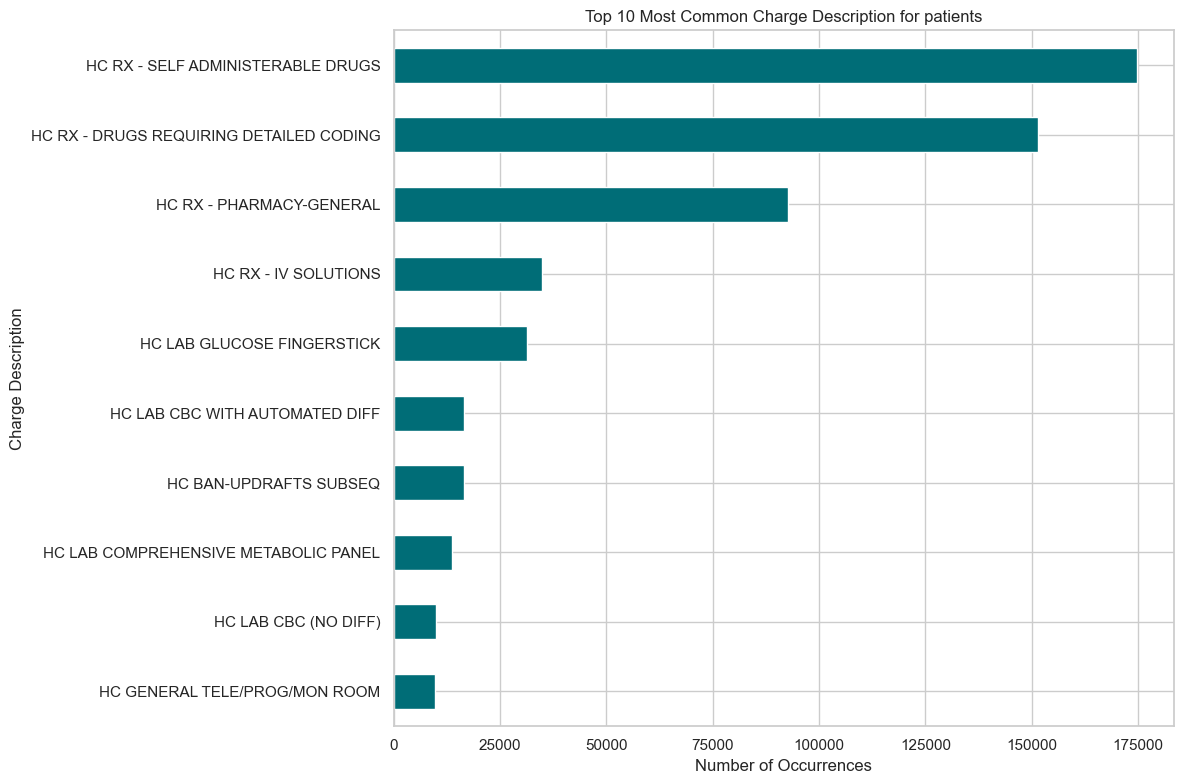

In [742]:
import matplotlib.pyplot as plt

top_10_charge_descriptions = most_common.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
top_10_charge_descriptions.plot(kind='barh', color='#006d77')
plt.title('Top 10 Most Common Charge Description for patients')
plt.xlabel('Number of Occurrences')
plt.ylabel('Charge Description')
plt.gca().invert_yaxis()  # Display the charge with the highest count at the top
plt.tight_layout()
plt.show()
